<a href="https://colab.research.google.com/github/harshvgangawane/PWSA4/blob/main/KNN_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21.Train a KNN Classifier on the Iris dataset and print model accuracy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

22.Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

In [4]:
from sklearn.datasets import make_regression
X1,y1=make_regression(n_samples=1000,n_features=2,random_state=2)
# Assign the output of train_test_split to the correct variables
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42) # changed this line
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor(n_neighbors=5)
reg.fit(X1_train,y1_train)
y2_pred=reg.predict(X1_test) # changed X2_test to X1_test, because X2_test wasn't defined either
from sklearn.metrics import mean_squared_error
mean_squared_error(y1_test,y2_pred) # changed y2 to y1_test, because y2 was the name of the original data before splitting

140.24638319386023

23.Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

In [5]:
clf_euclidean=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
clf.fit(X_train,y_train)
y_pred_euclidean=clf.predict(X_test)
accuracy_score(y_test,y_pred_euclidean)

1.0

In [6]:
clf_manhattan=KNeighborsClassifier(n_neighbors=5,metric='Manhattan')
clf.fit(X_train,y_train)
y_pred_manhattan=clf.predict(X_test)
accuracy_score(y_test,y_pred_manhattan)

1.0

24.Train a KNN Classifier with different values of K and visualize decision boundaries

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


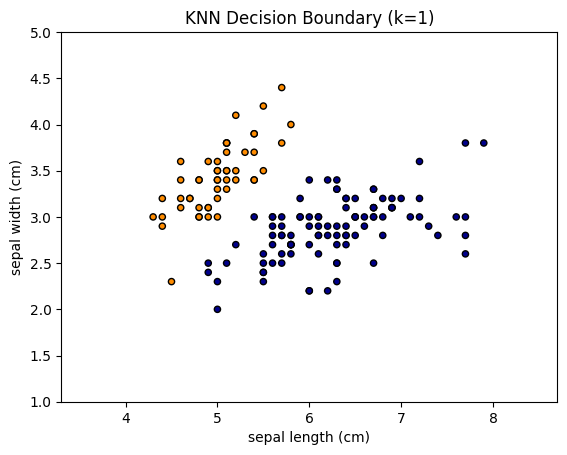

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


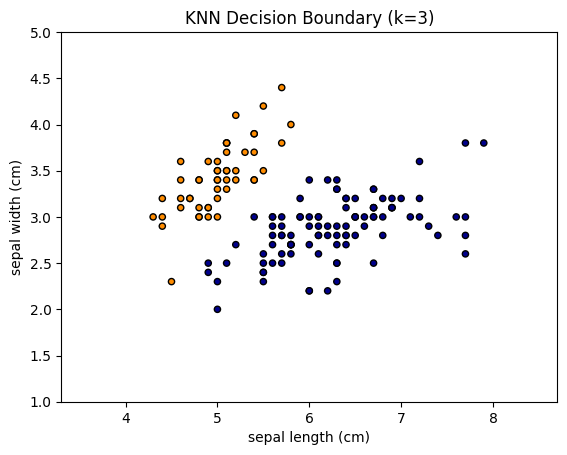

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


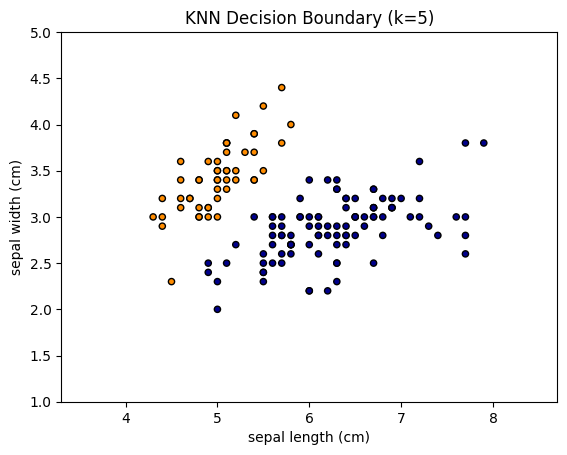

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


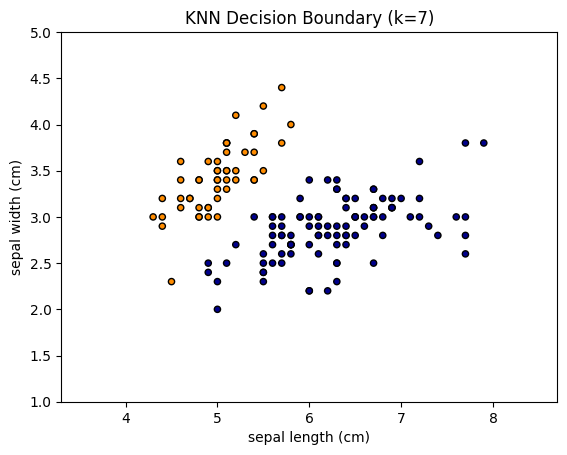

In [7]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X,y,clf,k):
  h=0.2
  cmap_light=ListedColormap(['orange','cyan'])
  cmap_bold=ListedColormap(['darkorange','darkblue'])
  x_min,x_max=X.iloc[:,0].min()-1,X.iloc[:,0].max()+1
  y_min,y_max=X.iloc[:,1].min()-1,X.iloc[:,1].max()+1
  xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max))
  X_pred = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, X.iloc[:, 2].mean()), np.full(xx.ravel().shape, X.iloc[:, 3].mean())]
  z=clf.predict(X_pred)

  plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
  plt.title(f"KNN Decision Boundary (k={k})")
  plt.xlabel(data.feature_names[0])
  plt.ylabel(data.feature_names[1])
  plt.show()

for k in [1,3,5,7]:
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    plot_decision_boundary(X,y,clf,k)

25.Apply Feature Scaling before training a KNN model and compare results with unscaled data

In [8]:
# prompt: Apply Feature Scaling before training a KNN model and compare results with unscaled data

from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN on scaled data
clf_scaled = KNeighborsClassifier(n_neighbors=5)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy with scaled data: {accuracy_scaled}")
print(f"Accuracy with original data: {accuracy_score(y_test, y_pred)}")


Accuracy with scaled data: 1.0
Accuracy with original data: 1.0


26.Train a PCA model on synthetic data and print the explained variance ratio for each component

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X1)
print(pca.explained_variance_ratio_)

[0.51238167 0.48761833]


27.Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

In [10]:
pca=PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [11]:
clf_pca=KNeighborsClassifier(n_neighbors=5)
clf_pca.fit(X_train_pca,y_train)
y_pred_pca=clf_pca.predict(X_test_pca)

In [12]:
accuracy_pca=accuracy_score(y_test,y_pred_pca)
print(f"Accuracy with PCA: {accuracy_pca}")
print(f"Accuracy without PCA: {accuracy_score(y_test,y_pred)}")

Accuracy with PCA: 1.0
Accuracy without PCA: 1.0


28.Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance'],'algorithm':['kd_tree','brute']}
grid_search=GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'uniform'}


In [14]:
print(f"Best score:{grid_search.best_score_}")
best_clf=grid_search.best_estimator_
y_pred_best=best_clf.predict(X_test)
acc=accuracy_score(y_test,y_pred_best)
print(f"Accuracy:{acc}")

Best score:0.9583333333333334
Accuracy:1.0


29.Train a KNN Classifier and check the number of misclassified samples

In [15]:
misclassified_samples = (y_test != y_pred).sum()
print(f"Number of misclassified samples: {misclassified_samples}")


Number of misclassified samples: 0


30.Train a PCA model and visualize the cumulative explained variance

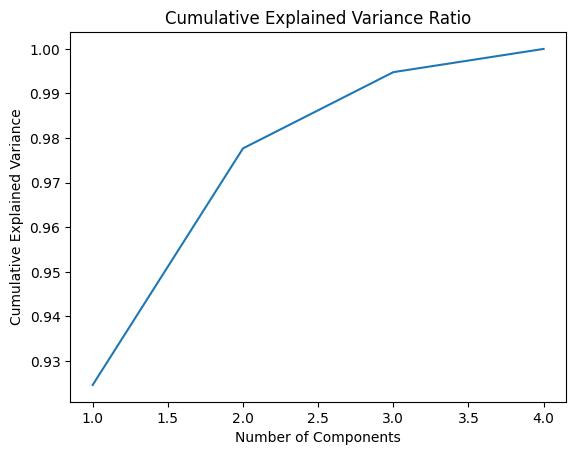

In [17]:
pca=PCA()
pca.fit(X)
variance=np.cumsum(pca.explained_variance_ratio_)
sns.lineplot(x=range(1,len(variance)+1),y=variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Ratio")
plt.show()

31.Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare
accuracy

In [18]:
clf_uniform=KNeighborsClassifier(n_neighbors=4,weights='uniform')
clf.fit(X_train,y_train)
y_pred_uniform=clf.predict(X_test)
acc_uniform=accuracy_score(y_test,y_pred_best)
print(f"Accuracy with uniform weights: {acc_uniform}")

Accuracy with uniform weights: 1.0


In [19]:
clf_distance=KNeighborsClassifier(n_neighbors=4,weights='distance')
clf.fit(X_train,y_train)
y_pred_distance=clf.predict(X_test)
accuracy_distance=accuracy_score(y_test,y_pred_best)
print(f"Accuracy with uniform weights: {accuracy_distance}")

Accuracy with uniform weights: 1.0


32.Train a KNN Regressor and analyze the effect of different K values on performance

In [20]:
k_values=[1,3,5,7,9,11]
mse_values=[]
for k in k_values:
  reg=KNeighborsRegressor(n_neighbors=k)
  reg.fit(X1_train,y1_train)
  y2_pred=reg.predict(X1_test)
  mse=mean_squared_error(y1_test,y2_pred)
  mse_values.append(mse)
  print(f"MSE for k={k}: {mse}")

MSE for k=1: 95.42694035326713
MSE for k=3: 89.0082266595055
MSE for k=5: 140.24638319386023
MSE for k=7: 185.81443838105116
MSE for k=9: 200.74073969018147
MSE for k=11: 235.3084898538683


33.Implement KNN Imputation for handling missing values in a dataset

In [21]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [22]:
df_imputed

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


34.Train a PCA model and visualize the data projection onto the first two principal components

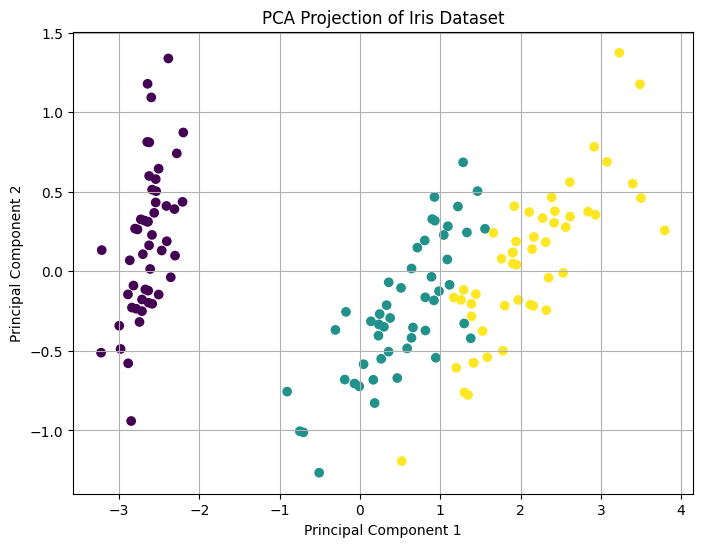

In [24]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Iris Dataset")
plt.grid(True)
plt.show()

35.Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

In [25]:
# prompt: Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

# Train KNN with KDTree
knn_kdtree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kdtree.fit(X_train, y_train)
y_pred_kdtree = knn_kdtree.predict(X_test)
accuracy_kdtree = accuracy_score(y_test, y_pred_kdtree)
print(f"Accuracy with KDTree: {accuracy_kdtree}")

# Train KNN with BallTree
knn_balltree = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_balltree.fit(X_train, y_train)
y_pred_balltree = knn_balltree.predict(X_test)
accuracy_balltree = accuracy_score(y_test, y_pred_balltree)
print(f"Accuracy with BallTree: {accuracy_balltree}")

# Compare performance
print(f"Difference in accuracy: {accuracy_kdtree - accuracy_balltree}")


Accuracy with KDTree: 1.0
Accuracy with BallTree: 1.0
Difference in accuracy: 0.0


36.Train a PCA model on a high-dimensional dataset and visualize the Scree plot

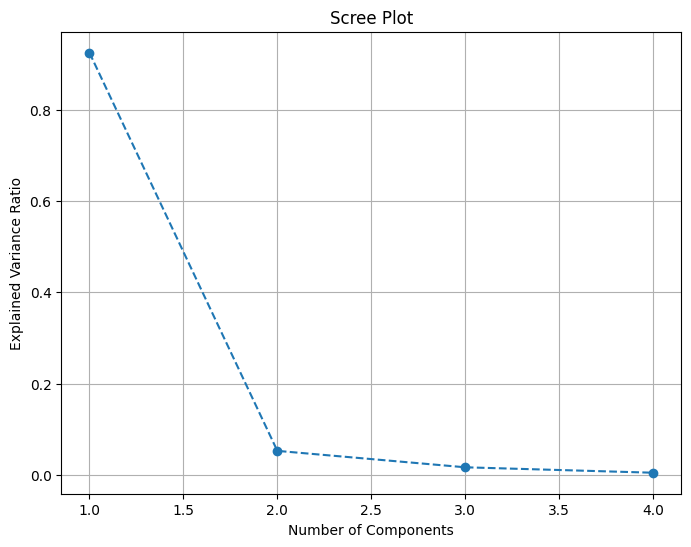

In [26]:
# prompt: 4 Train a PCA model on a high-dimensional dataset and visualize the Scree plot

pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred,average='weighted')
recall_score(y_test,y_pred,average='weighted')
f1_score(y_test,y_pred,average='weighted')

1.0

38.Train a PCA model and analyze the effect of different numbers of components on accuracy

In [31]:
for n_components in range(1,X.shape[1]+1):
    pca=PCA(n_components=n_components)
    X_train_pca=pca.fit_transform(X_train)
    X_test_pca=pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    y_pred_pca = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred_pca)

    print(f"Number of components: {n_components}, Accuracy: {accuracy}")



Number of components: 1, Accuracy: 1.0
Number of components: 2, Accuracy: 1.0
Number of components: 3, Accuracy: 1.0
Number of components: 4, Accuracy: 1.0


39.Train a KNN Classifier with different leaf_size values and compare accuracy.

In [33]:
leaf_sizes=[10,20,30,40]
accuracy=[]
for leaf_sizes in leaf_sizes:
    clf=KNeighborsClassifier(n_neighbors=5,leaf_size=leaf_sizes)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    accuracy.append(acc)
    print(f"Accuracy with leaf_size={leaf_sizes}: {acc}")

Accuracy with leaf_size=10: 1.0
Accuracy with leaf_size=20: 1.0
Accuracy with leaf_size=30: 1.0
Accuracy with leaf_size=40: 1.0


41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

In [36]:
from sklearn.datasets import load_wine
data_wine=load_wine()
df_wine=pd.DataFrame(data_wine.data,columns=data_wine.feature_names)
df_wine['Target']=data_wine.target
X=df_wine.drop('Target',axis=1)
y=df_wine['Target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



43. Train a KNN Classifier and evaluate using ROC-AUC score

In [39]:
from sklearn.metrics import roc_auc_score
y_pred_proba=clf.predict_proba(X_test)
roc_auc_score(y_test,y_pred,multi_class='ovr',average='weighted')

AxisError: axis 1 is out of bounds for array of dimension 1

In [40]:
from sklearn.metrics import roc_auc_score
y_pred_proba=clf.predict_proba(X_test) # Obtain predicted probabilities
roc_auc_score(y_test,y_pred_proba,multi_class='ovr',average='weighted') # Pass probabilities to roc_auc_score

np.float64(0.8945707070707071)

44.Train a KNN Classifier and perform feature selection before training

In [41]:
# prompt: Train a KNN Classifier and perform fe

from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=2) # Select top 2 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train KNN classifier on selected features
clf_selected = KNeighborsClassifier(n_neighbors=5)
clf_selected.fit(X_train_selected, y_train)
y_pred_selected = clf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Accuracy with feature selection: {accuracy_selected}")
print(f"Accuracy without feature selection: {accuracy_score(y_test, y_pred)}")


Accuracy with feature selection: 0.8055555555555556
Accuracy without feature selection: 0.7222222222222222


Train a KNN Classifier and perform feature selection before training

In [43]:
# prompt: Train a KNN Classifier and perform feature selection before training

# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=2) # Select top 2 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train KNN classifier on selected features
clf_selected = KNeighborsClassifier(n_neighbors=5)
clf_selected.fit(X_train_selected, y_train)
y_pred_selected = clf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Accuracy with feature selection: {accuracy_selected}")
print(f"Accuracy without feature selection: {accuracy_score(y_test, y_pred)}")


Accuracy with feature selection: 0.8055555555555556
Accuracy without feature selection: 0.7222222222222222


Train a PCA model and analyze the effect of different numbers of components on data variance.

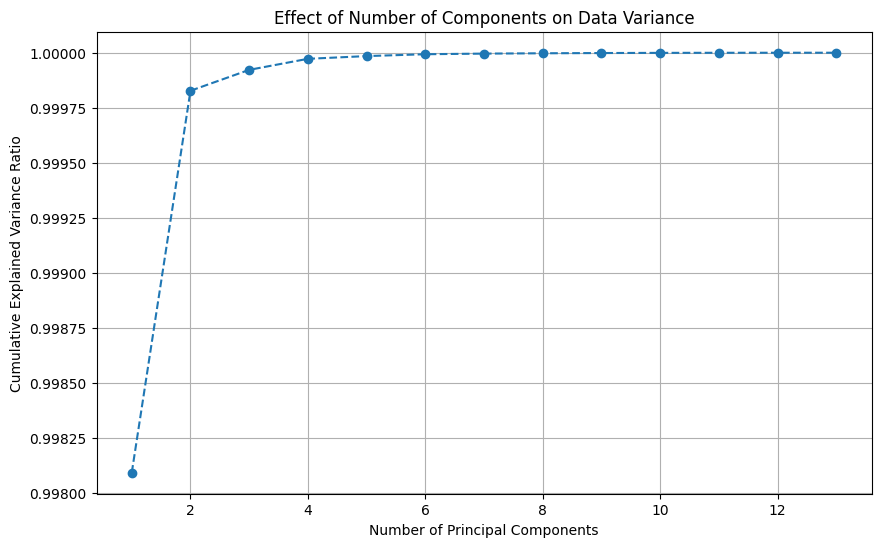

Number of components: 1, Cumulative Explained Variance: 0.9980912304918974
Number of components: 2, Cumulative Explained Variance: 0.9998271461166032
Number of components: 3, Cumulative Explained Variance: 0.9999221050741547
Number of components: 4, Cumulative Explained Variance: 0.9999723224303368
Number of components: 5, Cumulative Explained Variance: 0.9999846861150248
Number of components: 6, Cumulative Explained Variance: 0.99999314824536
Number of components: 7, Cumulative Explained Variance: 0.9999959550599172
Number of components: 8, Cumulative Explained Variance: 0.99999747814045
Number of components: 9, Cumulative Explained Variance: 0.9999986059708893
Number of components: 10, Cumulative Explained Variance: 0.9999993273867002
Number of components: 11, Cumulative Explained Variance: 0.9999997054469667
Number of components: 12, Cumulative Explained Variance: 0.9999999174607213
Number of components: 13, Cumulative Explained Variance: 1.0


In [44]:
# prompt: Train a PCA model and analyze the effect of different numbers of components on data variance.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'X' is your dataset (as defined in the provided code)
# Replace this with your actual dataset if 'X' is not defined in your current context

# Example:
# X = df.iloc[:,:-1] # Using the iris dataset from previous code blocks
# X = X1 # Using the synthetic regression data

pca = PCA()
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Effect of Number of Components on Data Variance")
plt.grid(True)
plt.show()

for n_components in range(1, len(cumulative_variance_ratio) + 1):
    print(f"Number of components: {n_components}, Cumulative Explained Variance: {cumulative_variance_ratio[n_components-1]}")
